## Artificial Intelligence Project to Implement Sudoku Puzzle

*by Namita Kharat (CSU ID: 831897879), December, 5, 2018* 

## Introduction

I have been playing Sudoku since childhood. I always loved solving Sudoku as it is challenging and fun to solve at the same time. I always wondered if there could be any way we can let computers solve it on their own as humans do (i.e. learn from mistakes). We can find many Sudoku Puzzle solvers using search algorithms and neural networks on the internet. However, I was always eager to know if it's possible to apply reinforcement learning to solve Sudoku.

Thus, with this motivation, I chose to implement Sudoku using Depth First Search and Reinforcement Learning Algorithm. The Depth First Search algorithm was inspired by the work of *Solving Every Sudoku Puzzle by Peter Norvig*. The code is beautifully explained by Naoki Shibuya in an article named *Sudoku Solver by Peter Norvig*. The references to both the code and the article are provided in the reference Section. I have added and removed some functions and modified the code a little for better understanding. The idea of implementing Sudoku using Reinforcement Learning has been inspired by a class assignment where we implemented Towers of Hanoi using reinforcement. I have used the assignment code and algorithm. In the proposal, I had mentioned that I will be implementing Sudoku using Neural Networks and will try to implement it using reinforcement learning as I was skeptical if I would be able to complete it within the given frame of time. Thus, I skipped Neural Networks and put all the efforts to get the Reinforcement Learning Solution for Sudoku puzzle working. 

**Sudoku**:

Sudoku is one of the most popular puzzle games of all times. This popular Japanese brain game is based on the logical placement of numbers. The objective is to fill a 9x9 grid with digits such that there is single occurence of that digit in each row, column and 3x3 section ('subgrids','boxes'). The digits can be only 1 to 9. There are many variants of this game such as variants of grid sizes. The most common is the 9x9 grid with 3x3 regions and others inlcude 4x4 grid with 2x2 regions and 6x6 grid 2x3 regions.

Heres an example of Sudoku puzzle where the black digits are given in the puzzle and solved are in red.

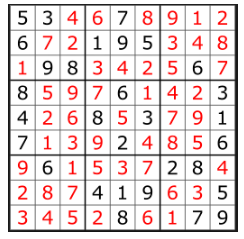

**Game Rules:**

Sudoku can have one(and only one) solution. The rules for the game are as follows:

**Rule 1:** Each row, column and subgrid can contain each number (1 to 9) exactly once.

**Rule 2:** The sum of all numbers in any subgrid, row or column must be 45 in a 9x9 grid puzzle.

The above rules are summarized in a line by Peter Norvig as:

"A puzzle is solved if the squares in each unit are filled with a permutation of the digits 1 to 9."


## Methods

**Search Method:**

The method uses some terms and functions which are briefly explained below:

* *Squares:* A 9x9 Sudoku puzzle is a grid of 81 squares where columns are labelled as 1-9 and rows are labelled as A-I as shown in figure.
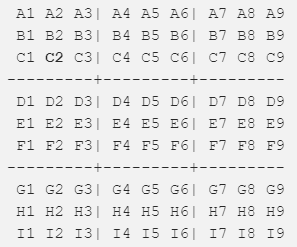
* *Cross Function:* This function is used to implement the above mentioned squares list.
* *Units:* In a Sudoku puzzle, each square has 3 units namely: column unit, row unit and box unit. These units represent that the digit should occur only once in each of its units.
The column unit for C2:

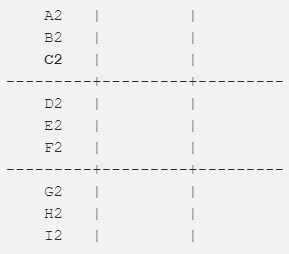
The row unit for C2:

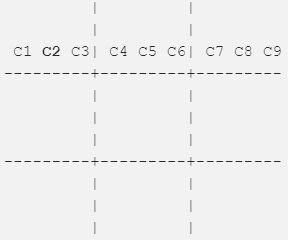
The box unit of C2:

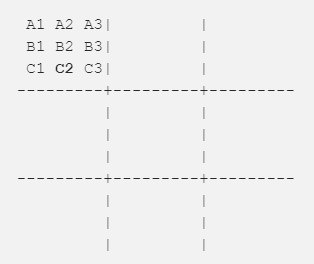

Cross function is used to generate the column units, row units and box units.
* *Peers: * Peers for any square is all the squares in the related 3 units except for that square itself.
* *Sudoku Puzzle Representation:* The code can take following 3 representations of the Sudoku puzzle:
    1. "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
    2. """
400000805
030000000
000700000
020000060
000080400
000010000
000603070
500200000
104000000"""
    3. """
4 . . |. . . |8 . 5 
. 3 . |. . . |. . . 
. . . |7 . . |. . . 
------+------+------
. 2 . |. . . |. 6 . 
. . . |. 8 . |4 . . 
. . . |. 1 . |. . . 
------+------+------
. . . |6 . 3 |. 7 . 
5 . . |2 . . |. . . 
1 . 4 |. . . |. . . 
"""

For solving Sudoku puzzle, implementation of following Constraint Propagation is required:
    1. Eliminate the value from the square's peers if it has only one possible value.
    2. Put the value in the unit which has only one possible place for that value.

* *get_values function:* This function is used to get the possible values for each square. In this, values are given digits as initial value in dictionary where each square is a key. Input parameter is the initial representation of Sudoku puzzle. Only relevant values such as digits, '0' and '.' are extracted from this input parameter. For each square with initial value, assign function is called to eliminate that value from the square's peers and assign it to the square. Assign Function returns False to indicate failure. The get_values function returns the dictionary of squares as its keys and the possible values for that square.
* *assign function:* This function is used for updating incoming values by eliminating other values from the square.
* *eliminate function:* This function removes the input parameter value from list of possible values for that square. It returns False, if there is no potential value for that square. It also removes the value from the peers if a square has only one possible value.
* *display function:* This function is used to print the result i.e. solved Sudoku puzzle in a more readable format.
* *solve function:* It is simply used to call the search function.
* *dfsearch function:* This function is used to search and propogate through possible values to reach the goal. The search algorithm is briefly explained by Peter in the following quotation:
"we search for a value d such that we can successfully search for a solution from the result of assigning square s to d. If the search leads to an failed position, go back and consider another value of d. This is a recursive search, and we call it a depth-first search because we (recursively) consider all possibilities under values[s] = d before we consider a different value for s."[2]
Variable ordering method is implemented in order to choose which square to start for exploring. The square with minimum number of possible values is chosen first. Thus, a square with minimum number of possible values is selected and assign function is called to eliminate that value from its peers. The search function is called recursively by passing values after  above elimination. If one of the attempt leads to success, the puzzle is solved.

**Reinforcement Learning:**

While working on this project, I came across an article defining Reinforcement Learning (Reinforcement Learning Definitions) as follows.
Reinforcement Learning can be explained using the following concepts:
* *Agent:* An Agent takes actions.
* *Action:* It is a set of all valid moves taken by an agent.
* *Discount Factor:* It is multiplied by future rewards in order to dampen rewards' effect on the agent's action choice. In other words, it is done to make future rewards worth less than immediate rewards. Discount Factor of 1 makes future rewards worth equals to that of immediate reward.
* *Environment:* The Environment takes the agent's current state and action and gives rewards and its next state as an output.
* *State:* It is a concrete situation of the agent.
* *Reward:* It is a feedback used to measure success and failure of the actions performed by the agent.
* *Policy:* It is a strategy to determine next valid move based on current state.
* *Q-value or action-value:* It refers to the long term return of the current state, taking action under policy. Q maps state-action to rewards.

Thus, environment is a function that tranforms the current state and action to reward and a new state. On the other hand, agents are functions that tranform this new state and rewards into next action. Here, the agent function is known. However, function of the environment is unknown. Reinforcement Learning is an agent's attempt to approximate this environment function in such a way that the reward is maximized.

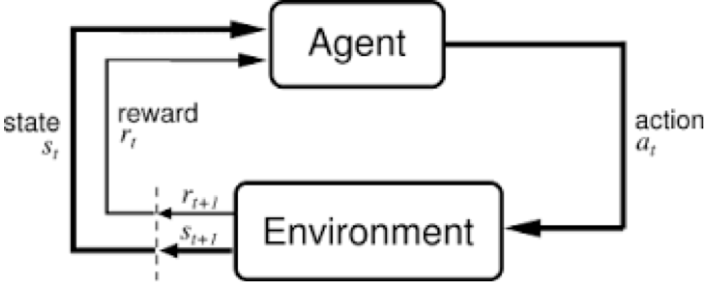

Thus, reinforcement learning judges actions by the results. The aim is to learn sequence of actions that leads an agent to it's goal. The values are calculated using two methods: *Monte Carlo* and *Temporal Difference*. Let's represent state, action, reinforcement, next state, next action as $s{_t}$, $a{_t}$, $r{_{t+1}}$, $s{_{t+1}}$ and $a{_{t+1}}$ respectively.

* *Monte Carlo:* In this, we assign to each state-action pair an average of the observed returns:
$$value(s{_t},a{_t}) \approx mean(R(s{_t},a{_t}))$$
* *Temporal Difference:* In this, we use $value(s{_{t+1}},a{_{t+1}})$ as estimate of return from next state, update current state-action value:
$$value(s{_t},a{_t}) \approx r{_{t+1}} + value(s{_{t+1}},a{_{t+1}})$$

I have taken following steps to implement Reinforcement Learning solution for Sudoku:

  - Represent the state, and use it as a tuple as a key to the Q dictionary.
  - Make sure only valid moves are tried from each state.
  - Assign reinforcement of $1$ to each move, even for the move that results in the goal state.

I have used Temporal Difference which is explained below briefly:
It is a technique used in reinforcement learning in which the discovered error is pushed in a movement to the previous state.
$$Q(oldstate,oldmove) = Q(oldstate,oldmove) + learningrate * (1 + Q(state,move) - Q(oldstate,oldmove))$$
The above equation, creates a Q table of positive values that approach 0 near the goal. Thus, the greedy search is looking for minimum value.

I started with a 3x3 puzzle and used reinforcement learning to implement it's solution. The constraint for a 3x3 puzzle was that a number can have only one occurence in that whole 3x3 unit. Thus, when I first implemented it, it solved for every iteration in fixed amount of steps ( which is equal to number of blanks). As there was no other constraint except the one explained above, there were n number of possibilities, the empty squares could be filled with. in order to make it learn for a 3x3 puzzle, I fixed a winner state. So, now for each iteration, the code runs till it finds a solution(i.e. final full state matches the winner state). This is made possible by updating the state to the start state if the state (no further moves possible i.e. state is Full) does not match the winner state.The state is updated to start state because if we delete a digit from a square based on rewards that would result in only one possible value for that square. Thus, the puzzle is started again until its state matches the winner state. The Q is updated accordingly. The state and index is represented as shown in figure.
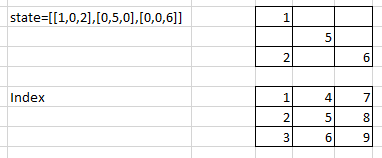
The following functions were used to implement the above logic.
* *printState(state):* This function prints the state in a specific format. State is a nested list where each list contains the elements column wise(shown above) and elements of each list are stored in variables which are then used to print.
* *makeMove(state, move):* State is copied in order to avoid changes in the original state. Move is list in which the first element is the index( position where we need to update the value) and the second element is the value with which it needs to be updated.
* *stateMoveTuple:* This function returns the tuple of state and move which is used as a key for the dictionary.
* *validMoves(state):* Returns lists of valid moves for that state. For each empty square, a nested list of index and possible value is given as an output.
* *winner(state,movewinnerState):* This function is used to check whether the goal has been reached.
* *getQ(state,Q,move,winnerState):* Returns the Q value. An immutable key value is used for the dictionary. This is achieved using stateMoveTuple function.
* *epsilonGreedy(epsilon,Q,state):* This function collects valid moves and returns a random move or the move having minimum value of Q (as I am using a reinforcement of 1) based on the epsilon value.
* stateFull(state,move): checks if all the empty squares are filled.
* *trainQ(startState,winnerState,nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):* For a given number of repetitions, the puzzle is solved repeatedly with the moves returned by the epsilonGreedy function. Update Q for steps > 1. Temporal difference error is calculated and multiplied with the learning rate to get Q. makeMoveF function is used to make the move and change the state. winner function is used to check if the goal is reached. If the state is Full and does not match the winner state, then state is updated to start state and the loop goes on till it reach its goal or maximum move is exceeded for that epoch.
* *testQ(startState,winnerState,Q, maxSteps, validMovesF, makeMoveF):* Epsilon is kept 0 in order to choose the greedy move always.

For a 9x9 Sudoku puzzle, I have used the same logic as mentioned above except the state and index representation is changed (as shown below) and I am not updating state to start state if for that epoch solution is not found as it would have made it more complex as there can millions of possibilities to fill up the square. However, a 9x9 Sudoku puzzle has only one solution and any square filled with wrong value will not lead to a solution. Thus, for every iteration, I have not made it compulsory to win. Instead, I am letting it know if the move it made is good or not by getting moves from winner state. This might not be the best way but this is how I could come up with solution for a 9x9 Sudoku puzzle. 

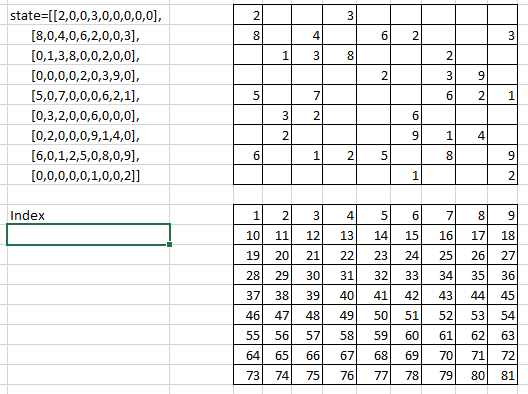

## Results

In [34]:
from Sudoku_Search import *
from Sudoku_3x3 import *
from Sudoku_9x9 import *

*Search Solution to Sudoku Puzzle*

In [5]:
grid1 = """
4 . . |. . . |8 . 5 
. 3 . |. . . |. . . 
. . . |7 . . |. . . 
------+------+------
. 2 . |. . . |. 6 . 
. . . |. 8 . |4 . . 
. . . |. 1 . |. . . 
------+------+------
. . . |6 . 3 |. 7 . 
5 . . |2 . . |. . . 
1 . 4 |. . . |. . . 
"""
get_values(grid1)

{'A1': '4',
 'A2': '1679',
 'A3': '12679',
 'A4': '139',
 'A5': '2369',
 'A6': '269',
 'A7': '8',
 'A8': '1239',
 'A9': '5',
 'B1': '26789',
 'B2': '3',
 'B3': '1256789',
 'B4': '14589',
 'B5': '24569',
 'B6': '245689',
 'B7': '12679',
 'B8': '1249',
 'B9': '124679',
 'C1': '2689',
 'C2': '15689',
 'C3': '125689',
 'C4': '7',
 'C5': '234569',
 'C6': '245689',
 'C7': '12369',
 'C8': '12349',
 'C9': '123469',
 'D1': '3789',
 'D2': '2',
 'D3': '15789',
 'D4': '3459',
 'D5': '34579',
 'D6': '4579',
 'D7': '13579',
 'D8': '6',
 'D9': '13789',
 'E1': '3679',
 'E2': '15679',
 'E3': '15679',
 'E4': '359',
 'E5': '8',
 'E6': '25679',
 'E7': '4',
 'E8': '12359',
 'E9': '12379',
 'F1': '36789',
 'F2': '4',
 'F3': '56789',
 'F4': '359',
 'F5': '1',
 'F6': '25679',
 'F7': '23579',
 'F8': '23589',
 'F9': '23789',
 'G1': '289',
 'G2': '89',
 'G3': '289',
 'G4': '6',
 'G5': '459',
 'G6': '3',
 'G7': '1259',
 'G8': '7',
 'G9': '12489',
 'H1': '5',
 'H2': '6789',
 'H3': '3',
 'H4': '2',
 'H5': '479',
 '

In [6]:
display(solve(grid1))


4 1 7 | 3 6 9 | 8 2 5
6 3 2 | 1 5 8 | 9 4 7
9 5 8 | 7 2 4 | 3 1 6
----------------------
8 2 5 | 4 3 7 | 1 6 9
7 9 1 | 5 8 6 | 4 3 2
3 4 6 | 9 1 2 | 7 5 8
-----------------------
2 8 9 | 6 4 3 | 5 7 1
5 7 3 | 2 9 1 | 6 8 4
1 6 4 | 8 7 5 | 2 9 3



In [7]:
grid2=".2.6.8...58...97......4....37....5..6.......4..8....13....2......98...36...3.6.9."
display(solve(grid2))


1 2 3 | 6 7 8 | 9 4 5
5 8 4 | 2 3 9 | 7 6 1
9 6 7 | 1 4 5 | 3 2 8
----------------------
3 7 2 | 4 6 1 | 5 8 9
6 9 1 | 5 8 3 | 2 7 4
4 5 8 | 7 9 2 | 6 1 3
-----------------------
8 3 6 | 9 2 4 | 1 5 7
2 1 9 | 8 5 7 | 4 3 6
7 4 5 | 3 1 6 | 8 9 2



In [8]:
grid3="""
020000000
000600003
074080000
000003002
080040010
600500000
000010780
500009000
000000040
"""
display(solve(grid3))


1 2 6 | 4 3 7 | 9 5 8
8 9 5 | 6 2 1 | 4 7 3
3 7 4 | 9 8 5 | 1 2 6
----------------------
4 5 7 | 1 9 3 | 8 6 2
9 8 3 | 2 4 6 | 5 1 7
6 1 2 | 5 7 8 | 3 9 4
-----------------------
2 6 9 | 3 1 4 | 7 8 5
5 4 8 | 7 6 9 | 2 3 1
7 3 1 | 8 5 2 | 6 4 9



The output of the get_values function is a dictionary consisting of squares as keys and its potential values. The output of the solve function is displayed in a readable format using the display function. Grid1, grid2 and grid3 are examples of sudoku puzzle with different levels of difficulty. Grid1 is easy, grid2 is intermediate and grid3 is hard. All three of them are correctly solved and does not take much of a time.

*Reinforcement Learning for a 3x3 Sudoku:*

In [9]:
# Start State
startState=[[1,0,2],[0,5,0],[0,0,6]]
printState(startState)

------
1    
  5  
2   6
------


In [10]:
# Winning State
winningState=[[1,4,2],[9,5,8],[3,7,6]]
printState(winningState)

------
1 9 3
4 5 7
2 8 6
------


In [11]:
Q, stepsToGoal = trainQ(startState,winningState,200, 1, 0.7, validMoves, makeMove)
print(stepsToGoal)

[  95 1820  165 1650   70 1550 1220   10  185  740  230   10  225  370
    5  140   15   80 1590 1575    5    5  145    5   35   90   15  230
   10 6270   10   45    5   25   15   20  275   20    5 1535   15    5
  305   20    5  570  125   10   10 1340   25  390    5   60   25    5
 1465   95    5   70  340   30    5   55   10  120   10   15    5  335
   20   10  115    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5 

In [13]:
path = testQ(startState,winningState,Q, 1000, validMoves, makeMove)
path

[[[1, 0, 2], [0, 5, 0], [0, 0, 6]],
 [[1, 4, 2], [0, 5, 0], [0, 0, 6]],
 [[1, 4, 2], [9, 5, 0], [0, 0, 6]],
 [[1, 4, 2], [9, 5, 8], [0, 0, 6]],
 [[1, 4, 2], [9, 5, 8], [3, 0, 6]],
 [[1, 4, 2], [9, 5, 8], [3, 7, 6]]]

From the above results, we can see that at learning rate=1 after 73 epochs, the code found the minimal optimal path to reach its goal. For epochs having steps greater than 5 are the ones where the algorithm could not find the winning state in the first attempt and had to start again. Thus, we successfully implemented reinforcement learning to get the desired result. Following is another example for a 3x3 Sudoku.

In [14]:
# Start State
startState=[[0,6,1],[0,8,9],[0,0,0]]
# Winning State
winningState=[[4,6,1],[3,8,9],[5,2,7]]

In [30]:
Q, stepsToGoal = trainQ(startState,winningState,200, 1, 0.7, validMoves, makeMove)
print(stepsToGoal)

[ 345  490  190 2030  600   65  190  535 1975  510  230   25 3000  375
   10   10 1620   85    5   10  310   60  105   25    5  330   20    5
 2880   10   60    5   85   30   10  310   20   20 3885   10  375   10
   10  730   10   25    5    5 1415   30    5  395    5   85   15   20
   60    5  730   55   40    5   65    5  805   15   15    5   50  120
   30   15  420   35   50    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5 

In [31]:
path = testQ(startState,winningState,Q, 1000, validMoves, makeMove)
path

[[[0, 6, 1], [0, 8, 9], [0, 0, 0]],
 [[4, 6, 1], [0, 8, 9], [0, 0, 0]],
 [[4, 6, 1], [3, 8, 9], [0, 0, 0]],
 [[4, 6, 1], [3, 8, 9], [5, 0, 0]],
 [[4, 6, 1], [3, 8, 9], [5, 2, 0]],
 [[4, 6, 1], [3, 8, 9], [5, 2, 7]]]

Now, let's plot a graph for Number of steps vs Number of repititions.

Text(0.5,1,'Number of Steps vs Number of Repetitions')

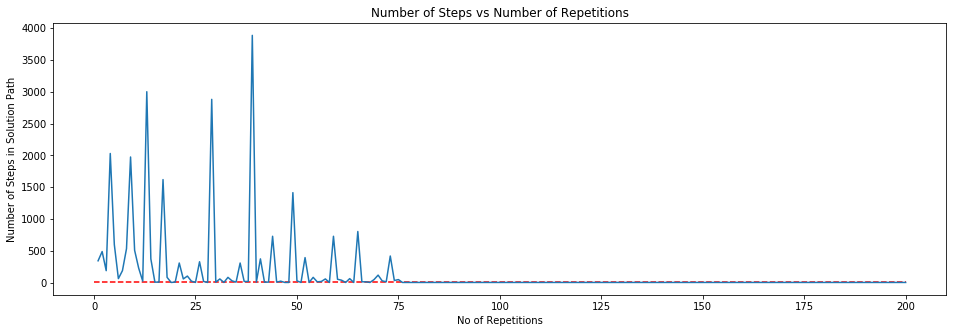

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
x = list(range(1, len(stepsToGoal) + 1)) # x has to be the same size as y
plt.subplot(1,1,1)     
plt.plot(x, stepsToGoal)
plt.hlines(y=5, xmin=0.0, xmax=200.0, color='r', linestyle='dashed')
plt.xlabel('No of Repetitions')
plt.ylabel('Number of Steps in Solution Path')
plt.title('Number of Steps vs Number of Repetitions')

The above graph shows that the optimal path of 5 steps is reached after 75 itertions.

Let's observe what happens if we change the learning rate.

In [18]:
Q, stepsToGoal = trainQ(startState,winningState,200, 0.1, 0.7, validMoves, makeMove)
print(stepsToGoal)

[1240  190  705  420   40  540  230  325  240  235 1645 2125  275   60
  750  320 1630  290 1425  505 4990  140  375  565  305  355  300  280
  585  840  275  650  645  745  685  110   45  110  810  310 4090 1235
  355  460  625   15  110   40  265  590  410  160  370  105   80   55
  255  290   75  280 3735 2365   45  185   50  230  405  535  215  100
  290  135  280   80  100  125  135 1490  255 1000  955 1540  615    5
  100  230   25   35  155  620  215  145  355  110  235  130   65  525
   15  110 3935 1335  510  180   95   60   35  185  290  195    5  120
   65   55  230  335 1185  240  165  305 3295  520  275  165  105   35
   10  245   15  235  415  200  175  275  165  490   95  150   85   70
 1230 1850  270  130  780  310  605   75  105  150  120  345  205  180
   85  105  365  750  185 2385  275  495  265  125  455   35  360  110
  105  165  145  235   65  225   35  100   55  160  200  295 3080  615
  545  180  135   70  335   35  130  175   85   95  195  130    5   25
  380 

The learning rate is too small, thus it did not reach its goal consecutively for iterations within 200 epochs. Let's now increase the learning rate to 2.

In [20]:
Q, stepsToGoal = trainQ(startState,winningState,200, 2, 0.7, validMoves, makeMove)
print(stepsToGoal)

[ 420  410  600  270  385  850  595  470  305 1065   40  625 3500 1620
  345  485  235 1505    5  780    5  900  665  360  445   20    5 1440
 1400   30  745    5   55  110  415  630   20    5    5    5    5    5
    5    5   10    5    5    5   10    5    5    5   10    5    5    5
   20  115    5 1290  125    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5   15   60    5   25  940  825    5    5    5   20
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5 

In [21]:
path = testQ(startState,winningState,Q, 1000, validMoves, makeMove)
path

[[[0, 6, 1], [0, 8, 9], [0, 0, 0]],
 [[0, 6, 1], [0, 8, 9], [0, 2, 0]],
 [[0, 6, 1], [3, 8, 9], [0, 2, 0]],
 [[4, 6, 1], [3, 8, 9], [0, 2, 0]],
 [[4, 6, 1], [3, 8, 9], [5, 2, 0]],
 [[4, 6, 1], [3, 8, 9], [5, 2, 7]]]

Text(0.5,1,'Number of Steps vs Number of Repetitions')

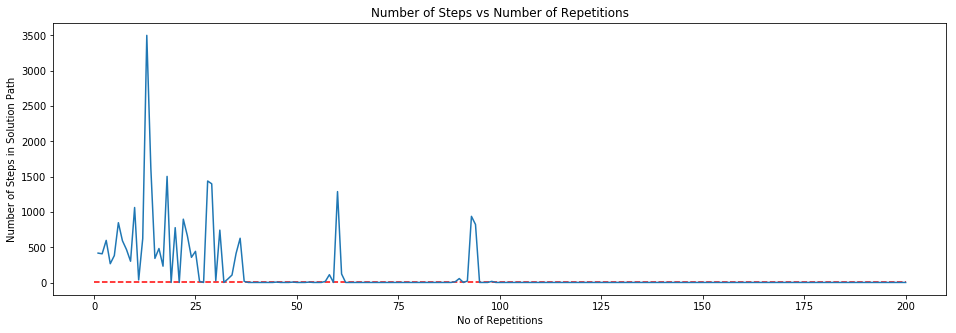

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
x = list(range(1, len(stepsToGoal) + 1)) # x has to be the same size as y
plt.subplot(1,1,1)     
plt.plot(x, stepsToGoal)
plt.hlines(y=5, xmin=0.0, xmax=200.0, color='r', linestyle='dashed')
plt.xlabel('No of Repetitions')
plt.ylabel('Number of Steps in Solution Path')
plt.title('Number of Steps vs Number of Repetitions')

Thus, using learning rate= 2, we were able to get the optimal path within 50 epochs. However, there are few peaks in number of steps after 50 epochs. Let's try for learning rate =5 and change number of repititions to 100.

In [23]:
Q, stepsToGoal = trainQ(startState,winningState,100, 5, 0.7, validMoves, makeMove)
print(stepsToGoal)

[ 605  320  150  345  370   40 1460  685 1975  315 1200   25 1110  260
 1080  230  515 1155  320  860  455 1350 1600  805 1945   85  450   10
  675  970  930  465  475  230    5  210  200  240  235  555   20    5
  175  690  430   35   30  210    5   25  470   60  165    5   45    5
  185    5   35    5   70  105   50    5   75    5  170    5   75    5
  110   45    5   55    5  125  300    5   45    5  140  260    5   45
    5  160   40    5   25    5  195  180   35    5  165   10   90    5
  105   55]


In [24]:
path = testQ(startState,winningState,Q, 1000, validMoves, makeMove)
path

[[[0, 6, 1], [0, 8, 9], [0, 0, 0]],
 [[0, 6, 1], [0, 8, 9], [0, 0, 7]],
 [[4, 6, 1], [0, 8, 9], [0, 0, 7]],
 [[4, 6, 1], [3, 8, 9], [0, 0, 7]],
 [[4, 6, 1], [3, 8, 9], [5, 0, 7]],
 [[4, 6, 1], [3, 8, 9], [5, 2, 7]]]

Text(0.5,1,'Number of Steps vs Number of Repetitions')

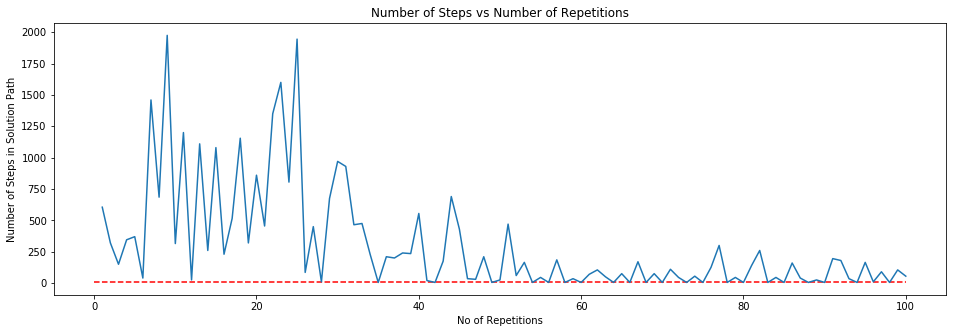

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
x = list(range(1, len(stepsToGoal) + 1)) # x has to be the same size as y
plt.subplot(1,1,1)     
plt.plot(x, stepsToGoal)
plt.hlines(y=5, xmin=0.0, xmax=100.0, color='r', linestyle='dashed')
plt.xlabel('No of Repetitions')
plt.ylabel('Number of Steps in Solution Path')
plt.title('Number of Steps vs Number of Repetitions')

We can see that increasing the learning rate further did not improve the results even if we found the optimal path. Thus, we get better results with learning rate=1. Now, let's observe if the results improve if we change epsilon decay factor.

In [27]:
Q, stepsToGoal = trainQ(startState,winningState,200, 1, 0.1, validMoves, makeMove)
print(stepsToGoal)

[ 350  285  750  675   35 1245  285  260 1920  105  265 2700  295   10
   10  395  205 2890  320   10   55  100   25  325   20    5 2700  155
   10   55   95   30    5    5  315   20    5   15 3610   15   15   10
   40  330   10   10  510   30  145   10   25 1360   35  330    5  120
   25    5   95    5  800   70   25  820   15   15   40  100   30    5
  455   20   15   40    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5 

In [28]:
path = testQ(startState,winningState,Q, 1000, validMoves, makeMove)
path

[[[0, 6, 1], [0, 8, 9], [0, 0, 0]],
 [[4, 6, 1], [0, 8, 9], [0, 0, 0]],
 [[4, 6, 1], [3, 8, 9], [0, 0, 0]],
 [[4, 6, 1], [3, 8, 9], [5, 0, 0]],
 [[4, 6, 1], [3, 8, 9], [5, 2, 0]],
 [[4, 6, 1], [3, 8, 9], [5, 2, 7]]]

Text(0.5,1,'Number of Steps vs Number of Repetitions')

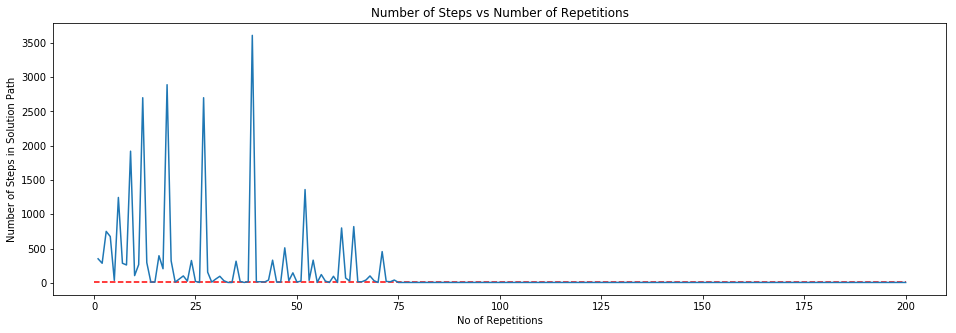

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
x = list(range(1, len(stepsToGoal) + 1)) # x has to be the same size as y
plt.subplot(1,1,1)     
plt.plot(x, stepsToGoal)
plt.hlines(y=5, xmin=0.0, xmax=200.0, color='r', linestyle='dashed')
plt.xlabel('No of Repetitions')
plt.ylabel('Number of Steps in Solution Path')
plt.title('Number of Steps vs Number of Repetitions')

Changing epsilon decay factor did not really made a difference.

*Reinforcement Learning for a 9x9 Sudoku:*

Let's try for an easy Sudoku Puzzle.

In [39]:
state=[[0,0,0,2,6,0,7,0,1],
       [6,8,0,0,7,0,0,9,0],
       [1,9,0,0,0,4,5,0,0],
       [8,2,0,1,0,0,0,4,0],
       [0,0,4,6,0,2,9,0,0],
       [0,5,0,0,0,3,0,2,8],
       [0,0,9,3,0,0,0,7,4],
       [0,4,0,0,5,0,0,3,6],
       [7,0,3,0,1,8,0,0,0]]
print('Sudoku Puzzle')
printState(state)
winnerState=[[4,3,5,2,6,9,7,8,1],
             [6,8,2,5,7,1,4,9,3],
             [1,9,7,8,3,4,5,6,2],
             [8,2,6,1,9,5,3,4,7],
             [3,7,4,6,8,2,9,1,5],
             [9,5,1,7,4,3,6,2,8],
             [5,1,9,3,2,6,8,7,4],
             [2,4,8,9,5,7,1,3,6],
             [7,6,3,4,1,8,2,5,9]]
print('Solved Sudoku')
printState(winnerState)
Q, stepsToGoal,goalReached = trainQ(state,winnerState,100, 0.1, 0.7, validMoves, makeMove)
print('Goal Reached',goalReached,'\n', 'stepsToGoal',stepsToGoal)

Sudoku Puzzle

      | 2 6   | 7   1
6 8   |   7   |   9  
1 9   |     4 | 5    
----------------------
8 2   | 1     |   4  
    4 | 6   2 | 9    
  5   |     3 |   2 8
-----------------------
    9 | 3     |   7 4
  4   |   5   |   3 6
7   3 |   1 8 |      

Solved Sudoku

4 3 5 | 2 6 9 | 7 8 1
6 8 2 | 5 7 1 | 4 9 3
1 9 7 | 8 3 4 | 5 6 2
----------------------
8 2 6 | 1 9 5 | 3 4 7
3 7 4 | 6 8 2 | 9 1 5
9 5 1 | 7 4 3 | 6 2 8
-----------------------
5 1 9 | 3 2 6 | 8 7 4
2 4 8 | 9 5 7 | 1 3 6
7 6 3 | 4 1 8 | 2 5 9

Goal Reached [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
 stepsToGoal [34 36 41 37 39 45 45 45 40 43 43 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 

In [36]:
path = testQ(state,winnerState,Q, 100, validMoves, makeMove)
for s in path:
    printState(s)
    print()

True

      | 2 6   | 7   1
6 8   |   7   |   9  
1 9   |     4 | 5    
----------------------
8 2   | 1     |   4  
    4 | 6   2 | 9    
  5   |     3 |   2 8
-----------------------
    9 | 3     |   7 4
  4   |   5   |   3 6
7   3 |   1 8 |      



4     | 2 6   | 7   1
6 8   |   7   |   9  
1 9   |     4 | 5    
----------------------
8 2   | 1     |   4  
    4 | 6   2 | 9    
  5   |     3 |   2 8
-----------------------
    9 | 3     |   7 4
  4   |   5   |   3 6
7   3 |   1 8 |      



4 3   | 2 6   | 7   1
6 8   |   7   |   9  
1 9   |     4 | 5    
----------------------
8 2   | 1     |   4  
    4 | 6   2 | 9    
  5   |     3 |   2 8
-----------------------
    9 | 3     |   7 4
  4   |   5   |   3 6
7   3 |   1 8 |      



4 3 5 | 2 6   | 7   1
6 8   |   7   |   9  
1 9   |     4 | 5    
----------------------
8 2   | 1     |   4  
    4 | 6   2 | 9    
  5   |     3 |   2 8
-----------------------
    9 | 3     |   7 4
  4   |   5   |   3 6
7   3 |   1 8 |      



4 

Now, following is an example for an intermediate level of difficulty.

In [40]:
state=[[0,2,0,6,0,8,0,0,0],
       [5,8,0,0,0,9,7,0,0],
       [0,0,0,0,4,0,0,0,0],
       [3,7,0,0,0,0,5,0,0],
       [6,0,0,0,0,0,0,0,4],
       [0,0,8,0,0,0,0,1,3],
       [0,0,0,0,2,0,0,0,0],
       [0,0,9,8,0,0,0,3,6],
       [0,0,0,3,0,6,0,9,0]]
winnerState=[[1,2,3,6,7,8,9,4,5],
       [5,8,4,2,3,9,7,6,1],
       [9,6,7,1,4,5,3,2,8],
       [3,7,2,4,6,1,5,8,9],
       [6,9,1,5,8,3,2,7,4],
       [4,5,8,7,9,2,6,1,3],
       [8,3,6,9,2,4,1,5,7],
       [2,1,9,8,5,7,4,3,6],
       [7,4,5,3,1,6,8,9,2]]
Qs, stepsToGoal,goalReached = trainQ(state,winnerState,100, 0.1, 0.7, validMoves, makeMove)
print('Goal Reached', goalReached)

Goal Reached [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [41]:
path = testQ(state,winnerState,Qs, 1000, validMoves, makeMove)
for s in path:
    printState(s)
    print()

True

  2   | 6   8 |      
5 8   |     9 | 7    
      |   4   |      
----------------------
3 7   |       | 5    
6     |       |     4
    8 |       |   1 3
-----------------------
      |   2   |      
    9 | 8     |   3 6
      | 3   6 |   9  



1 2   | 6   8 |      
5 8   |     9 | 7    
      |   4   |      
----------------------
3 7   |       | 5    
6     |       |     4
    8 |       |   1 3
-----------------------
      |   2   |      
    9 | 8     |   3 6
      | 3   6 |   9  



1 2 3 | 6   8 |      
5 8   |     9 | 7    
      |   4   |      
----------------------
3 7   |       | 5    
6     |       |     4
    8 |       |   1 3
-----------------------
      |   2   |      
    9 | 8     |   3 6
      | 3   6 |   9  



1 2 3 | 6 7 8 |      
5 8   |     9 | 7    
      |   4   |      
----------------------
3 7   |       | 5    
6     |       |     4
    8 |       |   1 3
-----------------------
      |   2   |      
    9 | 8     |   3 6
      | 3   6 |   9  



1 

Solve for harder Sudoku puzzle.

In [42]:
state=[[0,2,0,0,0,0,0,0,0],
      [0,0,0,6,0,0,0,0,3],
       [0,7,4,0,8,0,0,0,0],
       [0,0,0,0,0,3,0,0,2],
      [0,8,0,0,4,0,0,1,0],
       [6,0,0,5,0,0,0,0,0],
       [0,0,0,0,1,0,7,8,0],
      [5,0,0,0,0,9,0,0,0],
       [0,0,0,0,0,0,0,4,0]]
winnerState=[[1,2,6,4,3,7,9,5,8],
      [8,9,5,6,2,1,4,7,3],
       [3,7,4,9,8,5,1,2,6],
       [4,5,7,1,9,3,8,6,2],
      [9,8,3,2,4,6,5,1,7],
       [6,1,2,5,7,8,3,9,4],
       [2,6,9,3,1,4,7,8,5],
      [5,4,8,7,6,9,2,3,1],
       [7,3,1,8,5,2,6,4,9]]
Q, stepsToGoal,goalReached = trainQ(state,winnerState,100, 0.1, 0.7, validMoves, makeMove)
print(goalReached)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [43]:
path = testQ(state,winnerState,Q, 1000, validMoves, makeMove)
for s in path:
    printState(s)
    print()

True

  2   |       |      
      | 6     |     3
  7 4 |   8   |      
----------------------
      |     3 |     2
  8   |   4   |   1  
6     | 5     |      
-----------------------
      |   1   | 7 8  
5     |     9 |      
      |       |   4  



1 2   |       |      
      | 6     |     3
  7 4 |   8   |      
----------------------
      |     3 |     2
  8   |   4   |   1  
6     | 5     |      
-----------------------
      |   1   | 7 8  
5     |     9 |      
      |       |   4  



1 2 6 |       |      
      | 6     |     3
  7 4 |   8   |      
----------------------
      |     3 |     2
  8   |   4   |   1  
6     | 5     |      
-----------------------
      |   1   | 7 8  
5     |     9 |      
      |       |   4  



1 2 6 | 4     |      
      | 6     |     3
  7 4 |   8   |      
----------------------
      |     3 |     2
  8   |   4   |   1  
6     | 5     |      
-----------------------
      |   1   | 7 8  
5     |     9 |      
      |       |   4  



1 

The code is able to solve Sudoku after few iterations for all levels of difficulty of Sudoku puzzle. Since, I have not employed back tracking for a 9x9 sudoku as mentioned earlier. We have fixed number of steps which are equal to number of empty squares in the puzzle if it gets solved else the number of steps represent the state where it does not have any possible value for remaining empty squares. Goal reached = 1 represents that the puzzle was solved for that epoch. Thus, we observe 0 at the beginning and once it gets the Q values for best moves, it gets to the goal easily for consecutive epochs later.

**Note:** The above examples for Sudoku puzzle are taken from the link:
https://dingo.sbs.arizona.edu/~sandiway/sudoku/examples.html

## Conclusion:

From the above results, it can be concluded that both the algorithms were able to solve Sudoku puzzle except the reinforcement for 9x9 puzzle where I manipulated the algorithm to get results. For a 3x3 Sudoku, learning rate = 1 performed better. Through this project, I got thorough knowledge of reinforcement learning and the search algorithm. 

## References

1. *Solving Every Sudoku Puzzle by Peter Norvig:* http://www.norvig.com/sudoku.html
2. *Sudoku Solver by Peter Norvig:* https://towardsdatascience.com/peter-norvigs-sudoku-solver-25779bb349ce
3. *Reinforcement Learning Solution to the Towers of Hanoi Puzzle:* http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/A4%20Reinforcement%20Learning%20Solution%20to%20Towers%20of%20Hanoi.ipynb
4. *Reinforcement Learning Definitions:* https://skymind.ai/wiki/deep-reinforcement-learning#define

In [48]:
import io
from IPython.nbformat import current
import glob
nbfile = glob.glob('Kharat Final-Report.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Kharat Final-Report.ipynb is 2801
